MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000002811F288900> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'FancyArrow' object has no attribute 'set_positions'

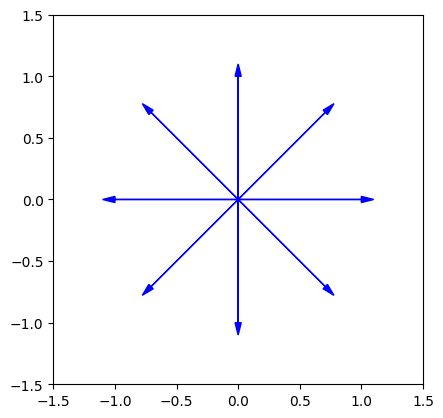

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 矢印を配置するための円のパラメータ
num_arrows = 8  # 矢印の数
radius = 1.0  # 矢印を配置する円の半径
angles = np.linspace(0, 2 * np.pi, num_arrows, endpoint=False)  # 矢印の角度

# 矢印の位置 (x, y) を円状に計算
x_positions = radius * np.cos(angles)
y_positions = radius * np.sin(angles)

# 振動の関数 (時間に対して変化)
def oscillation(t):
    return 0.5 * np.sin(2 * np.pi * t)  # 振動の範囲

# アニメーションを作成
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# 矢印を描画
arrows = []
for x, y, angle in zip(x_positions, y_positions, angles):
    arrow = ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
    arrows.append(arrow)

# フレーム更新関数
def update(frame):
    for i, arrow in enumerate(arrows):
        x = x_positions[i] * (1 + oscillation(frame))
        y = y_positions[i] * (1 + oscillation(frame))
        arrow.set_positions([0, 0], [x, y])

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 100), interval=50)

# GIFとして保存
ani.save('arrows_oscillation.gif', writer='imagemagick')

plt.show()
